In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import ast
import pandas as pd
import seaborn as sns
import demjson

In [3]:
project = 'FXML-POS'
filename = 'resultsPOS.csv'
df = pd.read_csv(filename, sep=';')

In [4]:
df.rename(columns={'chm_value': 'chm_values'}, inplace=True)
df.rename(columns={'chd_value': 'chd_values'}, inplace=True)

In [5]:
df['chm_value'] = df['chm_values'].apply(lambda x: float(x.split(',')[0].split('(')[1]))
df['chd_value'] = df['chd_values'].apply(lambda x: float(x.split(',')[0].split('(')[1]))

In [6]:
df.head()

,nb_clusters,conductance_value,modularity_value,smq_value,cmq_value,chd_values,chm_values,community_dict,chm_value,chd_value
0,2,0.084541,0.415386,0.002446,0.002434,"(0.39027311849168855, {1: 0.3939659074863284, ...","(0.46997286614763045, {1: 0.4681580324437467, ...",{1: ['com.rafsan.inventory.HibernateUtil.getSe...,0.469973,0.390273
1,3,0.120773,0.510814,0.004393,0.001430,"(0.40055860307799723, {0: 0.3905428272635865, ...","(0.4683225063324659, {0: 0.4571102413568167, 1...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.468323,0.400559
2,4,0.140097,0.599352,0.007166,0.001158,"(0.41323478889947474, {2: 0.39976469976469314,...","(0.4756038608229939, {2: 0.45642915642915644, ...",{2: ['com.rafsan.inventory.HibernateUtil.getSe...,0.475604,0.413235
3,5,0.144928,0.631794,0.009473,0.000904,"(0.42643067932621526, {0: 0.4068000494257418, ...","(0.4681557298706947, {0: 0.45897328003366294, ...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.468156,0.426431
4,6,0.183575,0.646935,0.011120,0.000666,"(0.43364703750153627, {0: 0.43238851095993686,...","(0.47966256981786975, {0: 0.4578853046594982, ...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.479663,0.433647


In [7]:
numerical_columns = ['smq_value', 'cmq_value', 'chd_value', 'chm_value']
suffix = '_std'

In [8]:
std_columns = [col+suffix for col in numerical_columns]
scaler = StandardScaler() # MinMaxScaler()
df[std_columns] = scaler.fit_transform(df[numerical_columns])

In [9]:
df['cmq_value_std'].mean()

-1.4099832412739488e-16

In [10]:
df.head()

,nb_clusters,conductance_value,modularity_value,smq_value,cmq_value,chd_values,chm_values,community_dict,chm_value,chd_value,smq_value_std,cmq_value_std,chd_value_std,chm_value_std
0,2,0.084541,0.415386,0.002446,0.002434,"(0.39027311849168855, {1: 0.3939659074863284, ...","(0.46997286614763045, {1: 0.4681580324437467, ...",{1: ['com.rafsan.inventory.HibernateUtil.getSe...,0.469973,0.390273,-1.759689,2.215770,-1.766551,-0.883543
1,3,0.120773,0.510814,0.004393,0.001430,"(0.40055860307799723, {0: 0.3905428272635865, ...","(0.4683225063324659, {0: 0.4571102413568167, 1...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.468323,0.400559,-1.468296,1.471942,-1.566464,-0.921129
2,4,0.140097,0.599352,0.007166,0.001158,"(0.41323478889947474, {2: 0.39976469976469314,...","(0.4756038608229939, {2: 0.45642915642915644, ...",{2: ['com.rafsan.inventory.HibernateUtil.getSe...,0.475604,0.413235,-1.052974,1.270245,-1.319871,-0.755300
3,5,0.144928,0.631794,0.009473,0.000904,"(0.42643067932621526, {0: 0.4068000494257418, ...","(0.4681557298706947, {0: 0.45897328003366294, ...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.468156,0.426431,-0.707658,1.082186,-1.063167,-0.924927
4,6,0.183575,0.646935,0.011120,0.000666,"(0.43364703750153627, {0: 0.43238851095993686,...","(0.47966256981786975, {0: 0.4578853046594982, ...",{0: ['com.rafsan.inventory.HibernateUtil.getSe...,0.479663,0.433647,-0.460999,0.906054,-0.922785,-0.662865


In [11]:
# sns.set_palette('colorblind')
# sns.set_palette('bright')
# sns.set_palette('Set2')
sns.set_palette("Set2")

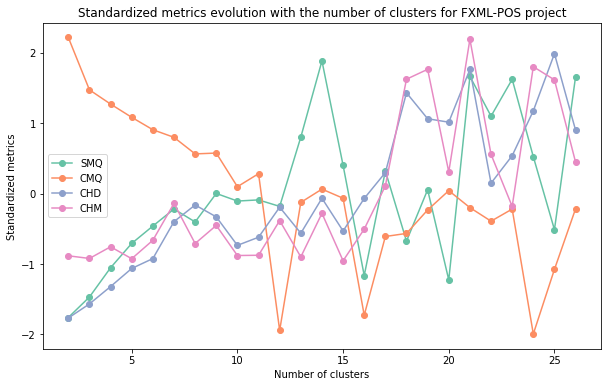

In [12]:
plt.figure(figsize=(10, 6))

for col in numerical_columns:
    plt.plot(df['nb_clusters'], df[col+suffix], marker='o', label=col.split('_')[0].upper())

plt.xlabel('Number of clusters')
plt.ylabel('Standardized metrics')
plt.title(f'Standardized metrics evolution with the number of clusters for {project} project')
plt.legend()
plt.savefig(f'{project}_viz.png')
plt.show()

In [13]:
### Find the best cluster

In [14]:
# sum the normalized quality metrics
df['criteria'] = df[std_columns].sum(axis=1)

In [15]:
df_sorted = df.sort_values(by='criteria', ascending=False)

In [23]:
print(df_sorted.iloc[0])
df_sorted.head()

nb_clusters                                                         21
conductance_value                                             0.466184
modularity_value                                              0.401019
smq_value                                                     0.025303
cmq_value                                                    -0.000826
chd_values           (0.5716733998176464, {6: 0.3997979797979796, 4...
chm_values           (0.6049710350639436, {6: 0.5181818181818182, 4...
community_dict       {6: ['com.rafsan.inventory.HibernateUtil.getSe...
chm_value                                                     0.604971
chd_value                                                     0.571673
smq_value_std                                                  1.66253
cmq_value_std                                                -0.199577
chd_value_std                                                 1.762286
chm_value_std                                                 2.190969
criter

,nb_clusters,conductance_value,modularity_value,smq_value,cmq_value,chd_values,chm_values,community_dict,chm_value,chd_value,smq_value_std,cmq_value_std,chd_value_std,chm_value_std,criteria
19,21,0.466184,0.401019,0.025303,-0.000826,"(0.5716733998176464, {6: 0.3997979797979796, 4...","(0.6049710350639436, {6: 0.5181818181818182, 4...",{6: ['com.rafsan.inventory.HibernateUtil.getSe...,0.604971,0.571673,1.662530,-0.199577,1.762286,2.190969,5.416208
24,26,0.495169,0.408904,0.025286,-0.000848,"(0.5273168945285969, {15: 0.423282247765008, 1...","(0.528317657590767, {15: 0.4942528735632184, 1...",{15: ['com.rafsan.inventory.HibernateUtil.getS...,0.528318,0.527317,1.660025,-0.215932,0.899405,0.445229,2.788726
17,19,0.538647,0.292898,0.014562,-0.000871,"(0.5356768931183991, {1: 0.4040873015873015, 1...","(0.5862058135654057, {1: 0.37894736842105264, ...",{1: ['com.rafsan.inventory.HibernateUtil.getSe...,0.586206,0.535677,0.054394,-0.232769,1.062035,1.763601,2.647261
23,25,0.463768,0.377850,0.010775,-0.002009,"(0.5831429356023398, {15: 0.39960317460317457,...","(0.5796461993499548, {15: 0.16666666666666666,...",{15: ['com.rafsan.inventory.HibernateUtil.getS...,0.579646,0.583143,-0.512584,-1.076090,1.985407,1.614209,2.010942
16,18,0.485507,0.360335,0.009693,-0.001320,"(0.5546054581755122, {6: 0.4123346560846561, 7...","(0.5800466660630621, {6: 0.2361111111111111, 7...",{6: ['com.rafsan.inventory.HibernateUtil.getSe...,0.580047,0.554605,-0.674607,-0.565825,1.430258,1.623330,1.813156


In [17]:
# best_cluster = json.loads(df_sorted.iloc[0]['community_dict'])

best_cluster = demjson.decode(df_sorted.iloc[0]['community_dict'])

In [18]:
print("This is the best clustering solution:")
for cluster, elements in best_cluster.items():
    print(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> CLUSTER {cluster} <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    for e in elements:
        print(f'    > {e} <')

This is the best clustering solution:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> CLUSTER 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    > com.rafsan.inventory.HibernateUtil.getSessionFactory <
    > com.rafsan.inventory.HibernateUtil.setSessionFactory <
    > com.rafsan.inventory.controller.purchase.PurchaseController.supplierAction <
    > com.rafsan.inventory.controller.supplier.AddController.handleSave <
    > com.rafsan.inventory.controller.supplier.EditController.handleSave <
    > com.rafsan.inventory.controller.supplier.EditController.setSupplier <
    > com.rafsan.inventory.controller.supplier.SupplierController.editAction <
    > com.rafsan.inventory.dao.PurchaseDao.PurchaseDao <
    > com.rafsan.inventory.entity.Supplier.Supplier <
    > com.rafsan.inventory.interfaces.SupplierInterface.SupplierInterface <
    > com.rafsan.inventory.model.PurchaseModel.PurchaseModel <
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> CLUSTER 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    > com.rafsan.inventory.MainApp.

In [24]:
df_sorted[df_sorted['nb_clusters']==9]

,nb_clusters,conductance_value,modularity_value,smq_value,cmq_value,chd_values,chm_values,community_dict,chm_value,chd_value,smq_value_std,cmq_value_std,chd_value_std,chm_value_std,criteria
7,9,0.285024,0.588485,0.014209,0.000219,"(0.46406978050578007, {7: 0.4393922841291284, ...","(0.4889130056103849, {7: 0.44770580296896084, ...",{7: ['com.rafsan.inventory.HibernateUtil.getSe...,0.488913,0.46407,0.001531,0.574935,-0.330961,-0.452191,-0.206687
